In [1]:
import pandas as pd 
import numpy as np 
import csv  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_validate


In [2]:
crashes_data = pd.read_csv('data/Traffic_Crashes_-_Crashes.csv')
crashes_data.info()

/Users/lorelablaka/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541142 entries, 0 to 541141
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                541142 non-null  object 
 1   RD_NO                          536550 non-null  object 
 2   CRASH_DATE_EST_I               41029 non-null   object 
 3   CRASH_DATE                     541142 non-null  object 
 4   POSTED_SPEED_LIMIT             541142 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         541142 non-null  object 
 6   DEVICE_CONDITION               541142 non-null  object 
 7   WEATHER_CONDITION              541142 non-null  object 
 8   LIGHTING_CONDITION             541142 non-null  object 
 9   FIRST_CRASH_TYPE               541142 non-null  object 
 10  TRAFFICWAY_TYPE                541142 non-null  object 
 11  LANE_CNT                       198968 non-null  float64
 12  ALIGNMENT                     

In [3]:
crashes_data.drop(crashes_data.columns[np.r_[1,2,5,10:13,15,17:20,21,24:35,36:43,48]], axis=1, inplace=True)
crashes_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541142 entries, 0 to 541141
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          541142 non-null  object 
 1   CRASH_DATE               541142 non-null  object 
 2   POSTED_SPEED_LIMIT       541142 non-null  int64  
 3   DEVICE_CONDITION         541142 non-null  object 
 4   WEATHER_CONDITION        541142 non-null  object 
 5   LIGHTING_CONDITION       541142 non-null  object 
 6   FIRST_CRASH_TYPE         541142 non-null  object 
 7   ROADWAY_SURFACE_COND     541142 non-null  object 
 8   ROAD_DEFECT              541142 non-null  object 
 9   CRASH_TYPE               541142 non-null  object 
 10  DAMAGE                   541142 non-null  object 
 11  PRIM_CONTRIBUTORY_CAUSE  541142 non-null  object 
 12  SEC_CONTRIBUTORY_CAUSE   541142 non-null  object 
 13  MOST_SEVERE_INJURY       540019 non-null  object 
 14  CRAS

Exploratory Data Analysis
Step 1: Import and read data
Step 2: Check datatypes
Step 3: Check duplicates
Step 4: Check nulls/missing values
Step 5: Check outliers

In [4]:
people_data = pd.read_csv('data/Traffic_Crashes_-_People.csv')
people_data.info()

/Users/lorelablaka/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195089 entries, 0 to 1195088
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1195089 non-null  object 
 1   PERSON_TYPE            1195089 non-null  object 
 2   CRASH_RECORD_ID        1195089 non-null  object 
 3   RD_NO                  1184791 non-null  object 
 4   VEHICLE_ID             1171503 non-null  float64
 5   CRASH_DATE             1195089 non-null  object 
 6   SEAT_NO                244372 non-null   float64
 7   CITY                   879272 non-null   object 
 8   STATE                  889722 non-null   object 
 9   ZIPCODE                802767 non-null   object 
 10  SEX                    1177027 non-null  object 
 11  AGE                    851997 non-null   float64
 12  DRIVERS_LICENSE_STATE  705170 non-null   object 
 13  DRIVERS_LICENSE_CLASS  607731 non-null   object 
 14  SAFETY_EQUIPMENT  

In [5]:
people_data = pd.read_csv('data/Traffic_Crashes_-_People.csv')
people_data.drop(people_data.columns[np.r_[3:10,11,12,13,17:30]], axis=1, inplace=True)
people_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195089 entries, 0 to 1195088
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   PERSON_ID         1195089 non-null  object
 1   PERSON_TYPE       1195089 non-null  object
 2   CRASH_RECORD_ID   1195089 non-null  object
 3   SEX               1177027 non-null  object
 4   SAFETY_EQUIPMENT  1191601 non-null  object
 5   AIRBAG_DEPLOYED   1172498 non-null  object
 6   EJECTION          1180555 non-null  object
dtypes: object(7)
memory usage: 63.8+ MB


In [6]:
vehicles_data = pd.read_csv('data/Traffic_Crashes_-_Vehicles.csv')
vehicles_data.info()

/Users/lorelablaka/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107267 entries, 0 to 1107266
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1107267 non-null  int64  
 1   CRASH_RECORD_ID           1107267 non-null  object 
 2   RD_NO                     1097786 non-null  object 
 3   CRASH_DATE                1107267 non-null  object 
 4   UNIT_NO                   1107267 non-null  int64  
 5   UNIT_TYPE                 1105670 non-null  object 
 6   NUM_PASSENGERS            165920 non-null   float64
 7   VEHICLE_ID                1081934 non-null  float64
 8   CMRC_VEH_I                20475 non-null    object 
 9   MAKE                      1081929 non-null  object 
 10  MODEL                     1081786 non-null  object 
 11  LIC_PLATE_STATE           987487 non-null   object 
 12  VEHICLE_YEAR              905696 non-null   float64
 13  VEHICLE_DEFECT            1

In [7]:
vehicles_data.drop(vehicles_data.columns[np.r_[0,2:13,16,18:38,39:72]], axis=1, inplace=True)
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107267 entries, 0 to 1107266
Data columns (total 6 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   CRASH_RECORD_ID      1107267 non-null  object
 1   VEHICLE_DEFECT       1081934 non-null  object
 2   VEHICLE_TYPE         1081934 non-null  object
 3   VEHICLE_USE          1081934 non-null  object
 4   MANEUVER             1081934 non-null  object
 5   FIRST_CONTACT_POINT  1073691 non-null  object
dtypes: object(6)
memory usage: 50.7+ MB


In [8]:
people_crashes_data = crashes_data.merge(people_data, on='CRASH_RECORD_ID')
df = people_crashes_data.merge(vehicles_data, on='CRASH_RECORD_ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2528859 entries, 0 to 2528858
Data columns (total 30 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   CRASH_RECORD_ID          object 
 1   CRASH_DATE               object 
 2   POSTED_SPEED_LIMIT       int64  
 3   DEVICE_CONDITION         object 
 4   WEATHER_CONDITION        object 
 5   LIGHTING_CONDITION       object 
 6   FIRST_CRASH_TYPE         object 
 7   ROADWAY_SURFACE_COND     object 
 8   ROAD_DEFECT              object 
 9   CRASH_TYPE               object 
 10  DAMAGE                   object 
 11  PRIM_CONTRIBUTORY_CAUSE  object 
 12  SEC_CONTRIBUTORY_CAUSE   object 
 13  MOST_SEVERE_INJURY       object 
 14  CRASH_HOUR               int64  
 15  CRASH_DAY_OF_WEEK        int64  
 16  CRASH_MONTH              int64  
 17  LATITUDE                 float64
 18  LONGITUDE                float64
 19  PERSON_ID                object 
 20  PERSON_TYPE              object 
 21  SEX     

In [9]:
df['MOST_SEVERE_INJURY'] = df['MOST_SEVERE_INJURY'].map({'NO INDICATION OF INJURY': 'mild', 
                                                                         'REPORTED, NOT EVIDENT': 'mild',
                                                                         'NONINCAPACITATING INJURY': 'medium',
                                                                         'INCAPACITATING INJURY': 'severe',
                                                                         'FATAL': 'severe'})
df['MOST_SEVERE_INJURY']

0          mild
1          mild
2          mild
3          mild
4          mild
           ... 
2528854    mild
2528855    mild
2528856    mild
2528857    mild
2528858    mild
Name: MOST_SEVERE_INJURY, Length: 2528859, dtype: object

In [10]:
df.duplicated().sum()

73592

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['LATITUDE'].fillna(df['LATITUDE'].mean(), inplace=True )
df['LONGITUDE'].fillna(df['LONGITUDE'].mean(), inplace=True )

In [13]:
df.dropna(subset=['MOST_SEVERE_INJURY'], inplace=True)

In [14]:
df['SAFETY_EQUIPMENT'].value_counts()

SAFETY BELT USED                              1216265
USAGE UNKNOWN                                 1094886
NONE PRESENT                                    77017
CHILD RESTRAINT USED                            16187
SAFETY BELT NOT USED                            14150
HELMET NOT USED                                  9452
CHILD RESTRAINT - FORWARD FACING                 4650
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)       3313
HELMET USED                                      2663
CHILD RESTRAINT - TYPE UNKNOWN                   2369
CHILD RESTRAINT - REAR FACING                    2257
DOT COMPLIANT MOTORCYCLE HELMET                  1277
BOOSTER SEAT                                     1225
CHILD RESTRAINT NOT USED                         1215
NOT DOT COMPLIANT MOTORCYCLE HELMET               258
SHOULD/LAP BELT USED IMPROPERLY                   246
WHEELCHAIR                                        229
CHILD RESTRAINT USED IMPROPERLY                   191
STRETCHER                   

In [15]:
df['SEX'].fillna('X', inplace=True)

df['SEX'] = df['SEX'].map({'M': 'M', 
                           'F': 'F',
                           'X': 'Unknown'})
df['SEX'].value_counts()

M          1277919
F           928875
Unknown     248453
Name: SEX, dtype: int64

In [16]:
df['SAFETY_EQUIPMENT'].fillna('USAGE UNKNOWN', inplace=True)
df['AIRBAG_DEPLOYED'].fillna('DEPLOYMENT UNKNOWN', inplace=True)
df['EJECTION'].fillna('UNKNOWN', inplace=True)
df['VEHICLE_DEFECT'].fillna('UNKNOWN', inplace=True)
df['VEHICLE_TYPE'].fillna('UNKNOWN/NA', inplace=True)
df['VEHICLE_USE'].fillna('UNKNOWN/NA', inplace=True)
df['MANEUVER'].fillna('UNKNOWN/NA', inplace=True)
df['FIRST_CONTACT_POINT'].fillna('UNKNOWN', inplace=True)
df


,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,PERSON_TYPE,SEX,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,FIRST_CONTACT_POINT
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DRIVER,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DRIVER,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT
2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DRIVER,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR
3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DRIVER,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT
4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,PASSENGER,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528853,d51aae396db49981c7ee26ceb54dfcab3c4b06d0cc5d7d...,07/12/2021 10:00:00 AM,30,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO SIDE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,DRIVER,M,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NONE,PASSENGER,PERSONAL,STRAIGHT AHEAD,FRONT-LEFT
2528854,d51aae396db49981c7ee26ceb54dfcab3c4b06d0cc5d7d...,07/12/2021 10:00:00 AM,30,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO SIDE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,DRIVER,F,SAFETY BELT USED,DID NOT DEPLOY,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR-LEFT
2528855,d51aae396db49981c7ee26ceb54dfcab3c4b06d0cc5d7d...,07/12/2021 10:00:00 AM,30,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO SIDE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,DRIVER,F,SAFETY BELT USED,DID NOT DEPLOY,NONE,NONE,PASSENGER,PERSONAL,STRAIGHT AHEAD,FRONT-LEFT
2528856,c83fa5092963bda54b781bf8cfdd840b5106004afbdd34...,07/13/2021 10:30:00 PM,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,DRIVER,F,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,UNKNOWN/NA,TOTAL (ALL AREAS)


In [17]:
df.isnull().sum()

CRASH_RECORD_ID            0
CRASH_DATE                 0
POSTED_SPEED_LIMIT         0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
MOST_SEVERE_INJURY         0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LATITUDE                   0
LONGITUDE                  0
PERSON_ID                  0
PERSON_TYPE                0
SEX                        0
SAFETY_EQUIPMENT           0
AIRBAG_DEPLOYED            0
EJECTION                   0
VEHICLE_DEFECT             0
VEHICLE_TYPE               0
VEHICLE_USE                0
MANEUVER                   0
FIRST_CONTACT_POINT        0
dtype: int64

In [18]:
import datetime as datetime
df['CRASH_DATE'] = df['CRASH_DATE'].map(lambda x: datetime.datetime.strptime(x[0:10], "%m/%d/%Y"))
df['CRASH_DATE']

0         2019-07-10
1         2019-07-10
2         2019-07-10
3         2019-07-10
4         2019-07-10
             ...    
2528853   2021-07-12
2528854   2021-07-12
2528855   2021-07-12
2528856   2021-07-13
2528857   2021-07-13
Name: CRASH_DATE, Length: 2455247, dtype: datetime64[ns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2455247 entries, 0 to 2528857
Data columns (total 30 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   CRASH_RECORD_ID          object        
 1   CRASH_DATE               datetime64[ns]
 2   POSTED_SPEED_LIMIT       int64         
 3   DEVICE_CONDITION         object        
 4   WEATHER_CONDITION        object        
 5   LIGHTING_CONDITION       object        
 6   FIRST_CRASH_TYPE         object        
 7   ROADWAY_SURFACE_COND     object        
 8   ROAD_DEFECT              object        
 9   CRASH_TYPE               object        
 10  DAMAGE                   object        
 11  PRIM_CONTRIBUTORY_CAUSE  object        
 12  SEC_CONTRIBUTORY_CAUSE   object        
 13  MOST_SEVERE_INJURY       object        
 14  CRASH_HOUR               int64         
 15  CRASH_DAY_OF_WEEK        int64         
 16  CRASH_MONTH              int64         
 17  LATITUDE                 fl

In [20]:
df["CRASH_DATE"].isin(pd.date_range("2019-01-01", "2020-01-01"))
# df['CRASH_DATE']

0           True
1           True
2           True
3           True
4           True
           ...  
2528853    False
2528854    False
2528855    False
2528856    False
2528857    False
Name: CRASH_DATE, Length: 2455247, dtype: bool

In [21]:
df= df[df["CRASH_DATE"].isin(pd.date_range("2019-01-01", "2020-01-01"))]

df

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,PERSON_TYPE,SEX,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,FIRST_CONTACT_POINT
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DRIVER,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DRIVER,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT
2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DRIVER,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR
3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DRIVER,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT
4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,PASSENGER,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528207,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DRIVER,M,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT
2528208,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DRIVER,M,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT
2528209,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DRIVER,F,SAFETY BELT USED,DID NOT DEPLOY,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT
2528210,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DRIVER,F,SAFETY BELT USED,DID NOT DEPLOY,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT


In [22]:

import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import descartes

<AxesSubplot:>

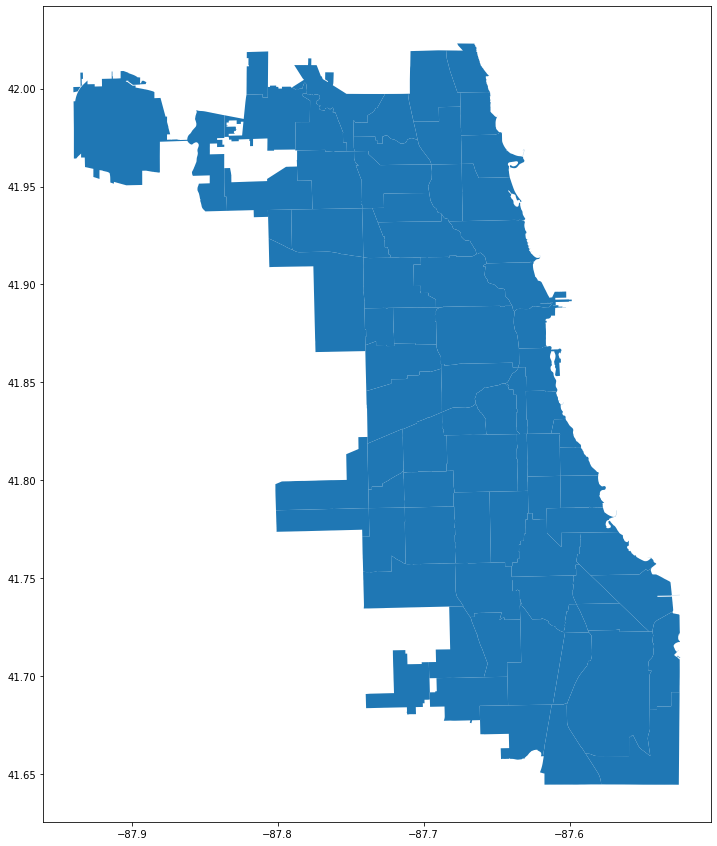

In [23]:
street_map = gpd.read_file('data/street_center_lines/geo_export_1cf411cc-3964-4b23-a824-9e05b1386235.shp')
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)


In [24]:
crs = {'init': 'epsg:4326'}
geo = [Point(xy) for xy in zip( df["LONGITUDE"], df["LATITUDE"])]
geo[:3]

In [25]:
geo_df = gpd.GeoDataFrame(df, crs=crs,  geometry=geo )
geo_df = geo_df[geo_df['LONGITUDE'] != 0.0]
geo_df

/Users/lorelablaka/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,SEX,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,FIRST_CONTACT_POINT,geometry
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966)
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.77329 41.91966)
2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966)
3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.77329 41.91966)
4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,M,USAGE UNKNOWN,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528207,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,M,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.70523 41.85817)
2528208,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,M,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.70523 41.85817)
2528209,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,F,SAFETY BELT USED,DID NOT DEPLOY,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.70523 41.85817)
2528210,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,F,SAFETY BELT USED,DID NOT DEPLOY,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.70523 41.85817)


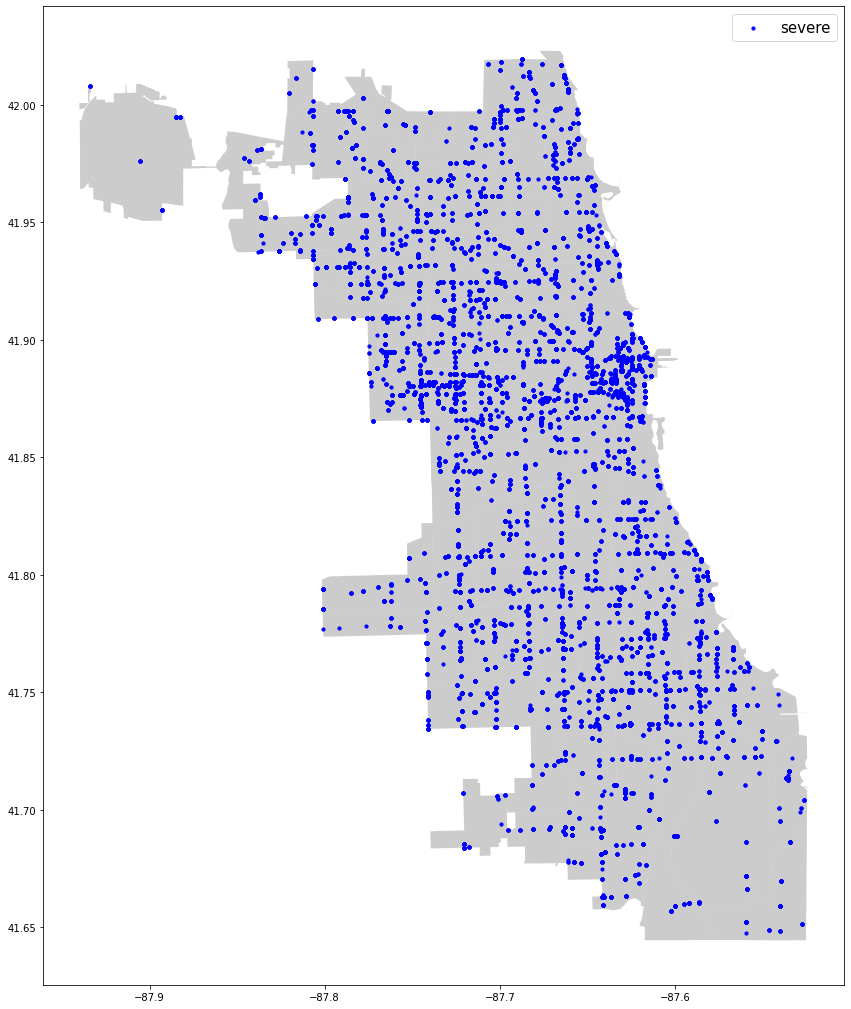

In [26]:
fig, ax = plt.subplots(figsize = (18,18))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['MOST_SEVERE_INJURY'] == 'severe'].plot(ax = ax, 
                                                        markersize = 10, 
                                                        color = 'blue', 
                                                        marker = 'o', 
                                                        label = 'severe')


# geo_df[geo_df['MOST_SEVERE_INJURY'] == 'medium risk'].plot(ax = ax, 
#                                                         markersize = 10, 
#                                                         color = 'red', 
#                                                         marker = 'o', 
#                                                         label = 'medium')

plt.legend(prop = {'size':15})


In [27]:
step  = 0.01
to_bin = lambda x: np.floor(x / step ) * step 
geo_df["latbin"] = geo_df['LATITUDE'].map(to_bin)
geo_df["latbin"]
geo_df["lonbin"] = geo_df['LONGITUDE'].map(to_bin)
geo_df


,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,AIRBAG_DEPLOYED,EJECTION,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,FIRST_CONTACT_POINT,geometry,latbin,lonbin
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966),41.91,-87.78
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.77329 41.91966),41.91,-87.78
2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966),41.91,-87.78
3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.77329 41.91966),41.91,-87.78
4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.77329 41.91966),41.91,-87.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528207,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.70523 41.85817),41.85,-87.71
2528208,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.70523 41.85817),41.85,-87.71
2528209,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DID NOT DEPLOY,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.70523 41.85817),41.85,-87.71
2528210,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DID NOT DEPLOY,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.70523 41.85817),41.85,-87.71


/Users/lorelablaka/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
No handles with labels found to put in legend.


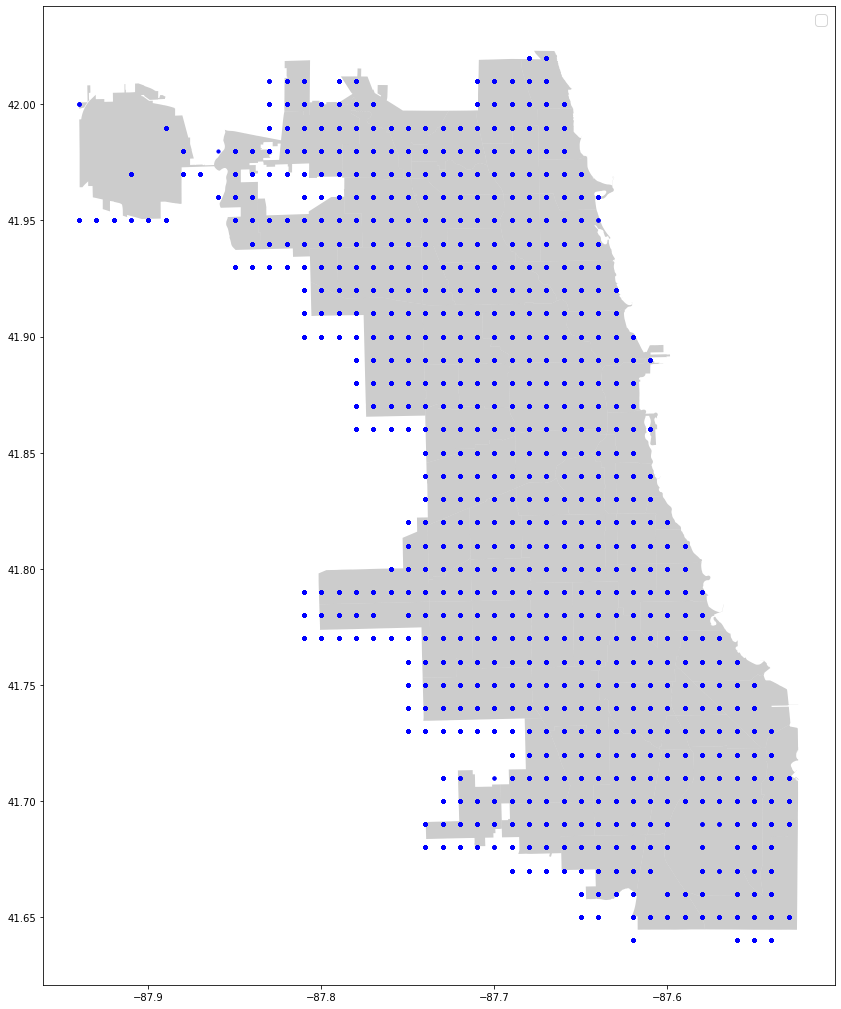

In [28]:
geo_bin = [Point(xy) for xy in zip( geo_df["lonbin"], geo_df["latbin"])]
geo_df_bin = gpd.GeoDataFrame(geo_df, crs=crs,  geometry=geo_bin )

fig, ax = plt.subplots(figsize = (18,18))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 10, color = 'blue', marker = 'o')


plt.legend(prop = {'size':15})




In [29]:
geo_bin = pd.DataFrame(geo_df[["lonbin","latbin"]].value_counts())
geo_bin.reset_index(inplace=True)
geo_bin['accident_count'] = geo_bin[0] 
geo_bin['accident_prob'] = 100*(geo_bin['accident_count']/geo_bin['accident_count'].sum())
print(geo_bin['accident_count'].quantile(.8) )     
print(geo_bin['accident_count'].quantile(.6) )     
print(geo_bin['accident_count'].quantile(.4) )     
print(geo_bin['accident_count'].quantile(.2) )     
      

1229.0
816.0
466.0
167.0


In [30]:
def label_zones(accident_count):
    if accident_count > 1229.0:
        return 5
    if accident_count < 1229.0 and accident_count > 816.0:
        return 4
    if accident_count < 816.0 and accident_count > 466.0:
        return 3
    if accident_count < 466.0 and accident_count > 167.0:
        return 2
    if accident_count < 167.0:
        return 1  

In [31]:
geo_bin['accident_risk'] = geo_bin['accident_count'].map(lambda x: label_zones(x))
geo_df

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,AIRBAG_DEPLOYED,EJECTION,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,FIRST_CONTACT_POINT,geometry,latbin,lonbin
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.78000 41.91000),41.91,-87.78
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.78000 41.91000),41.91,-87.78
2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.78000 41.91000),41.91,-87.78
3,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,TURNING RIGHT,FRONT,POINT (-87.78000 41.91000),41.91,-87.78
4,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10,35,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NOT APPLICABLE,NONE,UNKNOWN,PASSENGER,PERSONAL,BACKING,REAR,POINT (-87.78000 41.91000),41.91,-87.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528207,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.71000 41.85000),41.85,-87.71
2528208,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DEPLOYMENT UNKNOWN,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.71000 41.85000),41.85,-87.71
2528209,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DID NOT DEPLOY,NONE,UNKNOWN,PICKUP,UNKNOWN/NA,TURNING RIGHT,REAR-LEFT,POINT (-87.71000 41.85000),41.85,-87.71
2528210,ffff27f5ef6d4465bf2e6da46c1d07ac6f017c6ca1f477...,2019-06-19,25,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,DID NOT DEPLOY,NONE,UNKNOWN,UNKNOWN/NA,PERSONAL,TURNING LEFT,SIDE-RIGHT,POINT (-87.71000 41.85000),41.85,-87.71


In [32]:
df['PERSON_TYPE'].value_counts()

DRIVER                 414590
PASSENGER              116874
PEDESTRIAN               7260
BICYCLE                  3941
NON-MOTOR VEHICLE         488
NON-CONTACT VEHICLE       114
Name: PERSON_TYPE, dtype: int64

In [34]:
df = geo_df.merge(geo_bin, how = 'left', on = ['lonbin','latbin'])
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 543229 entries, 0 to 543228
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CRASH_RECORD_ID          543229 non-null  object        
 1   CRASH_DATE               543229 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT       543229 non-null  int64         
 3   DEVICE_CONDITION         543229 non-null  object        
 4   WEATHER_CONDITION        543229 non-null  object        
 5   LIGHTING_CONDITION       543229 non-null  object        
 6   FIRST_CRASH_TYPE         543229 non-null  object        
 7   ROADWAY_SURFACE_COND     543229 non-null  object        
 8   ROAD_DEFECT              543229 non-null  object        
 9   CRASH_TYPE               543229 non-null  object        
 10  DAMAGE                   543229 non-null  object        
 11  PRIM_CONTRIBUTORY_CAUSE  543229 non-null  object        
 12  SEC_CONT

In [35]:
df['FIRST_CRASH_TYPE'].value_counts()

REAR END                        155398
SIDESWIPE SAME DIRECTION         97291
TURNING                          93662
PARKED MOTOR VEHICLE             70344
ANGLE                            65827
PEDESTRIAN                       14715
SIDESWIPE OPPOSITE DIRECTION      8942
FIXED OBJECT                      8763
PEDALCYCLIST                      8508
REAR TO FRONT                     6255
HEAD ON                           5012
REAR TO SIDE                      3937
OTHER OBJECT                      2180
REAR TO REAR                      1320
OTHER NONCOLLISION                 799
ANIMAL                             120
OVERTURNED                         120
TRAIN                               36
Name: FIRST_CRASH_TYPE, dtype: int64

In [36]:
df.drop(df.columns[np.r_[9,17,18,19,30:34,35]], axis=1, inplace=True)
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 543229 entries, 0 to 543228
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CRASH_RECORD_ID          543229 non-null  object        
 1   CRASH_DATE               543229 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT       543229 non-null  int64         
 3   DEVICE_CONDITION         543229 non-null  object        
 4   WEATHER_CONDITION        543229 non-null  object        
 5   LIGHTING_CONDITION       543229 non-null  object        
 6   FIRST_CRASH_TYPE         543229 non-null  object        
 7   ROADWAY_SURFACE_COND     543229 non-null  object        
 8   ROAD_DEFECT              543229 non-null  object        
 9   DAMAGE                   543229 non-null  object        
 10  PRIM_CONTRIBUTORY_CAUSE  543229 non-null  object        
 11  SEC_CONTRIBUTORY_CAUSE   543229 non-null  object        
 12  MOST_SEV

# Train Test Split

In [37]:
X = df.drop(["MOST_SEVERE_INJURY","CRASH_RECORD_ID", "CRASH_DATE"], axis=1)


In [38]:
df['MOST_SEVERE_INJURY'] = df['MOST_SEVERE_INJURY'].map({'mild': 0, 
                                                         'medium': 1,
                                                         'severe': 2})
y = df['MOST_SEVERE_INJURY']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 42, stratify=y)

In [40]:
y.value_counts()

0    473724
1     56285
2     13220
Name: MOST_SEVERE_INJURY, dtype: int64

In [41]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

/Users/lorelablaka/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [42]:
X_train['SEX'].fillna('X', inplace=True)

X_train['SEX'] = X_train['SEX'].map({'M': 'M', 
                           'F': 'F',
                           'X': 'Unknown'})
X_train['SEX'].value_counts()

/Users/lorelablaka/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/Users/lorelablaka/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


M    198270
F    145650
Name: SEX, dtype: int64

In [76]:
X_train['SAFETY_EQUIPMENT'].fillna('USAGE UNKNOWN', inplace=True)
X_train['AIRBAG_DEPLOYED'].fillna('DEPLOYMENT UNKNOWN', inplace=True)
X_train['EJECTION'].fillna('UNKNOWN', inplace=True)
X_train['VEHICLE_DEFECT'].fillna('UNKNOWN', inplace=True)
X_train['VEHICLE_TYPE'].fillna('UNKNOWN/NA', inplace=True)
X_train['VEHICLE_USE'].fillna('UNKNOWN/NA', inplace=True)
X_train['MANEUVER'].fillna('UNKNOWN/NA', inplace=True)
X_train['FIRST_CONTACT_POINT'].fillna('UNKNOWN', inplace=True)
X_train['accident_risk'].fillna(4, inplace=True)
X_train['accident_count'].fillna(X_train['accident_count'].mean(), inplace=True)

/Users/lorelablaka/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [77]:
X_train.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 380260 entries, 469268 to 307969
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   POSTED_SPEED_LIMIT       380260 non-null  int64 
 1   DEVICE_CONDITION         380260 non-null  object
 2   WEATHER_CONDITION        380260 non-null  object
 3   LIGHTING_CONDITION       380260 non-null  object
 4   FIRST_CRASH_TYPE         380260 non-null  object
 5   ROADWAY_SURFACE_COND     380260 non-null  object
 6   ROAD_DEFECT              380260 non-null  object
 7   DAMAGE                   380260 non-null  object
 8   PRIM_CONTRIBUTORY_CAUSE  380260 non-null  object
 9   SEC_CONTRIBUTORY_CAUSE   380260 non-null  object
 10  CRASH_HOUR               380260 non-null  int64 
 11  CRASH_DAY_OF_WEEK        380260 non-null  int64 
 12  CRASH_MONTH              380260 non-null  int64 
 13  PERSON_TYPE              380260 non-null  object
 14  SEX    

# Baseline-dummy_model

In [78]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [79]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_model.predict(X_train)[:50]
cv_results = cross_validate(dummy_model, X_train, y_train, return_train_score=True)

print('Mean Train Score: {}'.format(cv_results['train_score'].mean()))

Mean Train Score: 0.8720533319307842


# Logistic Model - 1

In [80]:
categoricals = ['DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE','PERSON_TYPE', 'SEX', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'MANEUVER', 'FIRST_CONTACT_POINT']

train_dummies = X_train[categoricals]
#test_dummies = X_test[categoricals]

# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')
# Transform the dataset into dummies matrix

enc = ohe.fit(train_dummies)
train_dummies_trans = enc.transform(train_dummies)
#test_dummies_trans = enc.transform(test_dummies)

# Dummies values in matrix form
train_data = train_dummies_trans.todense()
#test_data = test_dummies_trans.todense()

# New dummy column names
names = ohe.get_feature_names(categoricals)

# Make them into Dataframe
train_dummies_trans_df = pd.DataFrame(train_data, columns=names,index = X_train.index)
#test_dummies_trans_df = pd.DataFrame(test_data, columns=names)

train_dummies_trans_df

# left_index/right_index = True


,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,WEATHER_CONDITION_BLOWING SNOW,WEATHER_CONDITION_CLEAR,...,FIRST_CONTACT_POINT_OTHER,FIRST_CONTACT_POINT_REAR,FIRST_CONTACT_POINT_REAR-LEFT,FIRST_CONTACT_POINT_REAR-RIGHT,FIRST_CONTACT_POINT_ROOF,FIRST_CONTACT_POINT_SIDE-LEFT,FIRST_CONTACT_POINT_SIDE-RIGHT,FIRST_CONTACT_POINT_TOTAL (ALL AREAS),FIRST_CONTACT_POINT_UNDER CARRIAGE,FIRST_CONTACT_POINT_UNKNOWN
469268,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271259,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236546,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
348900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500326,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111730,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [82]:
numerical = X_train.select_dtypes(exclude='object') 
numerical = pd.DataFrame(numerical, index = X_train.index)
train_df = train_dummies_trans_df.merge(numerical, left_index = True , right_index=True)
train_df

,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,WEATHER_CONDITION_BLOWING SNOW,WEATHER_CONDITION_CLEAR,...,FIRST_CONTACT_POINT_SIDE-LEFT,FIRST_CONTACT_POINT_SIDE-RIGHT,FIRST_CONTACT_POINT_TOTAL (ALL AREAS),FIRST_CONTACT_POINT_UNDER CARRIAGE,FIRST_CONTACT_POINT_UNKNOWN,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,accident_count
469268,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,30,18,5,1,871
147190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,25,20,3,12,1587
271259,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,30,12,7,9,753
236546,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,30,18,6,12,243
348900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,30,16,2,1,1109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,30,13,7,6,1835
500326,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,30,12,2,5,466
190290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30,21,7,10,2290
111730,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,30,10,2,5,1802


In [ ]:
model_1 = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000000)
X_train_baseline = train_df

# fit the model
model_1.fit(X_train_baseline,y_train)

In [ ]:
# get importance
importance = model_1.coef_[0]

In [ ]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

In [ ]:
y_hat = model_1.predict(X_train_baseline)

In [ ]:
acc = accuracy_score(y_train,y_hat)
macro_precision_score=precision_score(y_train, y_hat, average='macro')
micro_precision_score=precision_score(y_train, y_hat, average='micro')
macro_recall_score=recall_score(y_train, y_hat, average='macro')
micro_recall_score=recall_score(y_train, y_hat, average='micro')



In [ ]:
print('Accuracy Score: {}'.format(acc))
print('Macro Precision Score: {}'.format(macro_precision_score))
print('Micro Precision Score: {}'.format(micro_precision_score))
print('Macro Recall Score: {}'.format(macro_recall_score))
print('Micro Recall Score: {}'.format(micro_recall_score))



In [ ]:
cv_results = cross_validate(model_1, train_dummies_trans_df, y_train, return_train_score=True)

print('Mean Test Score: {}'.format(cv_results['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results['train_score'].mean()))

# Decision Tree

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2) 

tree_clf.fit(train_dummies_trans_df, y_train)

y_pred_dt = tree_clf.predict(train_dummies_trans_df)
y_pred_dt

In [ ]:
acc = accuracy_score(y_train,y_pred_dt) * 100
print("Accuracy: {0}".format(acc))

In [ ]:
precision_score(y_train, y_pred_dt, average='macro')

In [ ]:
precision_score(y_train, y_pred_dt, average='micro')

In [ ]:
precision_score(y_train, y_pred_dt, average='weighted')

In [ ]:
train_dummies_trans_df.iloc[:,58]

In [ ]:
train_dummies_trans_df.iloc[:,34]

In [ ]:
train_dummies_trans_df.iloc[:,34]

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
plot_tree(tree_clf, ax=ax);